In [1]:
!pip install yfinance pandas numpy matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [3]:
def load_crypto_data(symbol, start="2022-01-01", end="2025-01-01"):
    df = yf.download(symbol, start=start, end=end)
    df = df[['Close']]
    df.dropna(inplace=True)
    df['Return'] = df['Close'].pct_change()
    df.dropna(inplace=True)
    return df

df = load_crypto_data("BTC-USD")
df.head()


/tmp/ipython-input-3742471755.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,Return
Ticker,BTC-USD,
Date,,
2022-01-02,47345.218750,-0.007163
2022-01-03,46458.117188,-0.018737
2022-01-04,45897.574219,-0.012066
2022-01-05,43569.003906,-0.050734
2022-01-06,43160.929688,-0.009366


In [4]:
def add_trends(df):
    df['MA_7'] = df['Close'].rolling(7).mean()
    df['MA_30'] = df['Close'].rolling(30).mean()
    df['Trend'] = np.where(df['MA_7'] > df['MA_30'], "Uptrend", "Downtrend")
    return df

df = add_trends(df)
df[['Close', 'MA_7', 'MA_30', 'Trend']].tail()


Price,Close,MA_7,MA_30,Trend
Ticker,BTC-USD,,,
Date,,,,
2024-12-27,94164.859375,96421.652902,98667.262760,Downtrend
2024-12-28,95163.929688,96127.253348,98650.978125,Downtrend
2024-12-29,93530.226562,95902.294643,98519.934896,Downtrend
2024-12-30,92643.210938,95610.433036,98393.073438,Downtrend
2024-12-31,93429.203125,94860.877232,98264.720573,Downtrend


In [5]:
def calculate_volatility(df):
    df['Rolling_Volatility'] = df['Return'].rolling(30).std() * np.sqrt(365)
    return df

def volatility_level(vol):
    if vol < 0.3:
        return "Low"
    elif vol < 0.6:
        return "Medium"
    else:
        return "High"

df = calculate_volatility(df)
df[['Return', 'Rolling_Volatility']].tail()


Price,Return,Rolling_Volatility
Ticker,,
Date,,
2024-12-27,-0.017022,0.453488
2024-12-28,0.010610,0.454952
2024-12-29,-0.017167,0.453582
2024-12-30,-0.009484,0.453360
2024-12-31,0.008484,0.453326


In [6]:
def risk_score(vol):
    score = min(100, int(vol * 100))
    if score < 30:
        level = "Low Risk"
    elif score < 60:
        level = "Medium Risk"
    else:
        level = "High Risk"
    return score, level

latest_vol = df['Rolling_Volatility'].iloc[-1]
score, risk_level = risk_score(latest_vol)

print("Latest Volatility:", round(latest_vol, 2))
print("Risk Score:", score)
print("Risk Category:", risk_level)


Latest Volatility: 0.45
Risk Score: 45
Risk Category: Medium Risk


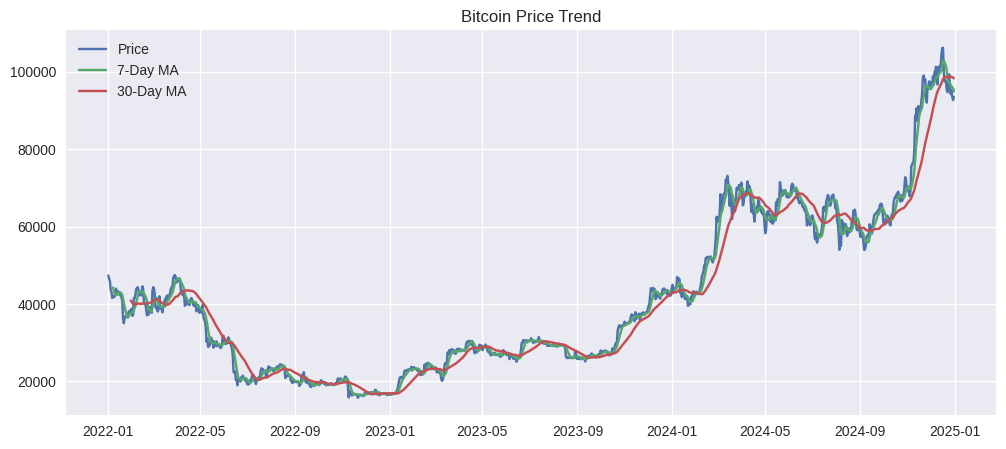

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label="Price")
plt.plot(df['MA_7'], label="7-Day MA")
plt.plot(df['MA_30'], label="30-Day MA")
plt.title("Bitcoin Price Trend")
plt.legend()
plt.show()


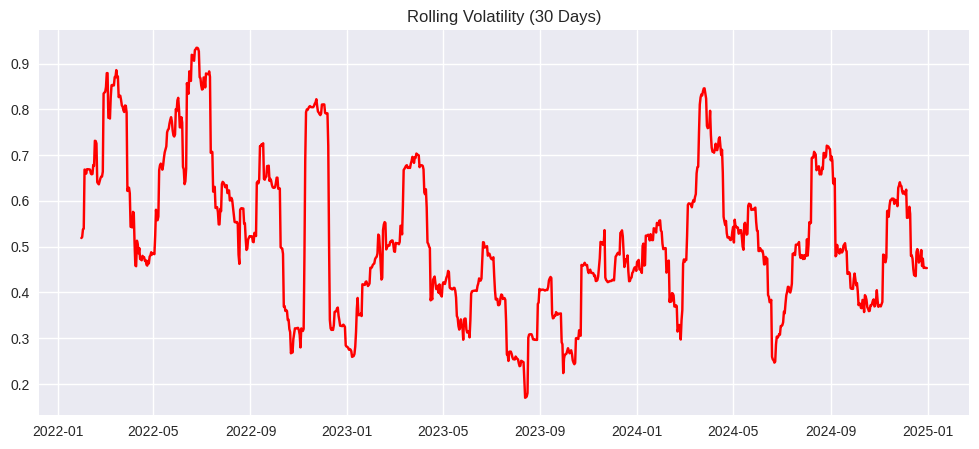

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df['Rolling_Volatility'], color="red")
plt.title("Rolling Volatility (30 Days)")
plt.show()


In [9]:
summary = pd.DataFrame({
    "Metric": ["Latest Volatility", "Risk Score", "Risk Category"],
    "Value": [round(latest_vol, 2), score, risk_level]
})

summary


,Metric,Value
0,Latest Volatility,0.45
1,Risk Score,45
2,Risk Category,Medium Risk


In [12]:
df.to_csv("final_crypto_analysis.csv")
summary.to_csv("risk_summary.csv", index=False)


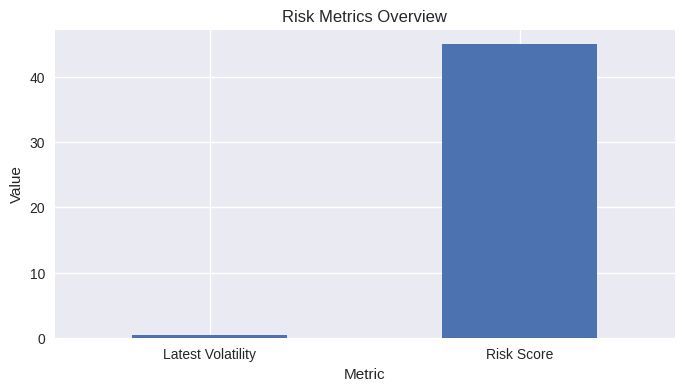

In [13]:
numeric_summary = summary[summary["Metric"] != "Risk Category"]

numeric_summary.plot(
    kind="bar",
    x="Metric",
    y="Value",
    legend=False,
    figsize=(8,4)
)

plt.title("Risk Metrics Overview")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()


In [14]:
print("Final Risk Assessment:", risk_level)


Final Risk Assessment: Medium Risk


In [15]:
from IPython.display import Markdown, display

display(Markdown(f"### 🚨 Overall Risk Category: **{risk_level}**"))


### 🚨 Overall Risk Category: **Medium Risk**

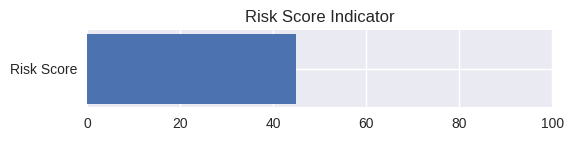

In [16]:
plt.figure(figsize=(6,1))
plt.barh(["Risk Score"], [score])
plt.xlim(0,100)
plt.title("Risk Score Indicator")
plt.show()


In [17]:
cryptos = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Binance Coin": "BNB-USD"
}


In [18]:
comparison_results = []

for name, symbol in cryptos.items():
    temp_df = load_crypto_data(symbol)
    temp_df = add_trends(temp_df)
    temp_df = calculate_volatility(temp_df)

    latest_vol = temp_df['Rolling_Volatility'].iloc[-1]
    score, level = risk_score(latest_vol)

    comparison_results.append([
        name,
        round(latest_vol, 2),
        score,
        level
    ])


/tmp/ipython-input-3742471755.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3742471755.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3742471755.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [19]:
comparison_df = pd.DataFrame(
    comparison_results,
    columns=["Cryptocurrency", "Volatility", "Risk Score", "Risk Level"]
)

comparison_df


,Cryptocurrency,Volatility,Risk Score,Risk Level
0,Bitcoin,0.45,45,Medium Risk
1,Ethereum,0.63,63,High Risk
2,Binance Coin,0.74,74,High Risk


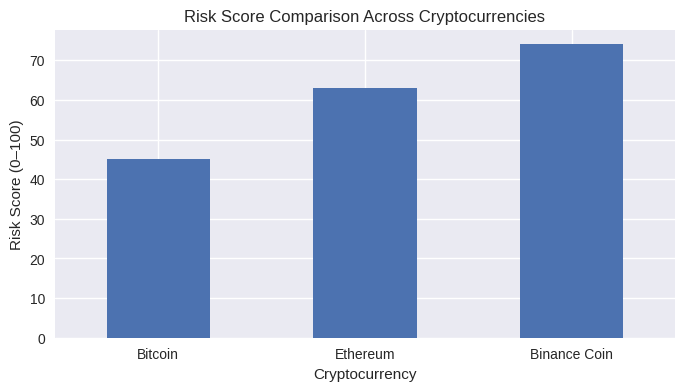

In [20]:
comparison_df.plot(
    x="Cryptocurrency",
    y="Risk Score",
    kind="bar",
    legend=False,
    figsize=(8,4)
)

plt.title("Risk Score Comparison Across Cryptocurrencies")
plt.ylabel("Risk Score (0–100)")
plt.xticks(rotation=0)
plt.show()


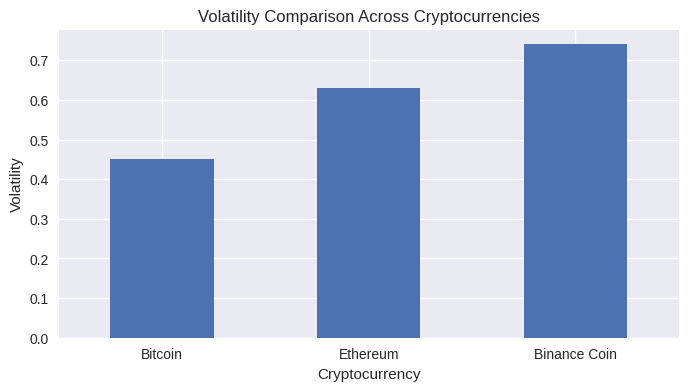

In [21]:
comparison_df.plot(
    x="Cryptocurrency",
    y="Volatility",
    kind="bar",
    legend=False,
    figsize=(8,4)
)

plt.title("Volatility Comparison Across Cryptocurrencies")
plt.ylabel("Volatility")
plt.xticks(rotation=0)
plt.show()


In [22]:
comparison_df.to_csv("crypto_comparison.csv", index=False)


In [25]:
!git config --global user.email "priyankajonnalagadda0@gmail.com"
!git config --global user.name "Priyanka Jonnalagadda"


In [26]:
!git add .
!git commit -m "Initial commit"


[main (root-commit) 46c4ee7] Initial commit
 24 files changed, 52165 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2026.01.16/14.23.31.981136.log
 create mode 100644 .config/logs/2026.01.16/14.24.03.314209.log
 create mode 100644 .config/logs/2026.01.16/14.24.13.071214.log
 create mode 100644 .config/logs/2026.01.16/14.24.18.954466.log
 create mode 100644 .config/logs/2026.01.16/14.24.28.646070.log
 create mode 100644 .config/logs/2026.01.16/14.24.29.392089.log
 create mode 100644 crypto_comparison.csv
 create mode 100644

In [27]:
!git branch -m main


In [28]:
!git remote add origin https://github.com/priyankajonnalagadda/Crypto-volatility-risk-analyzer.git
!git push -u origin main


error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address
